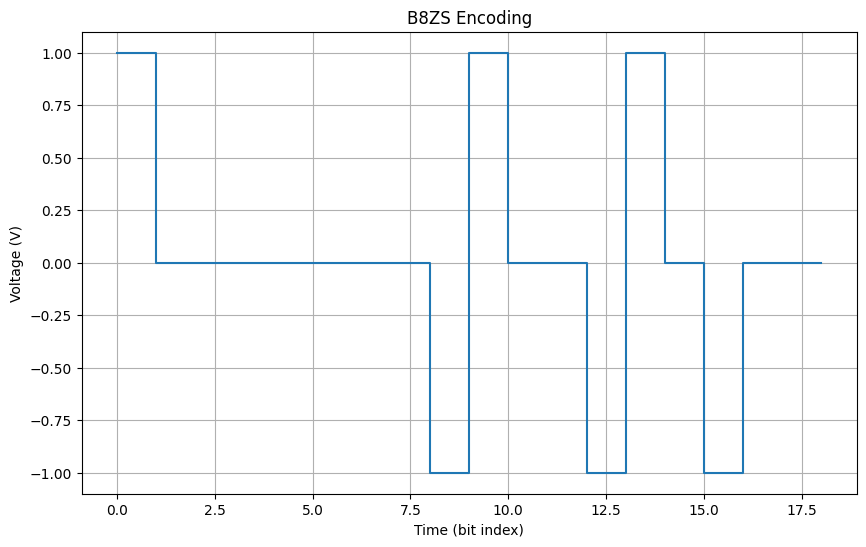

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def b8zs_encode(data):

    encoded_signal = []
    count = 0
    previous_polarity = 1  # Starting with +1V (Positive Polarity)

    # Iterate through the data
    for i in range(len(data)):
        if data[i] == 0:
            count += 1
        else:
            count = 0

        # If there are 8 consecutive zeros, apply B8ZS substitution
        if count == 8:
            encoded_signal.extend([0, previous_polarity, 0, -previous_polarity, 0, 0, previous_polarity, -previous_polarity])
            count = 0
            previous_polarity = -previous_polarity  # Flip the polarity for the next bits
        else:
            # Normal encoding for 1's and 0's
            if data[i] == 1:
                encoded_signal.append(previous_polarity)
                previous_polarity = -previous_polarity  # Flip polarity for next bit
            else:
                encoded_signal.append(0)  # No voltage for zero

    return encoded_signal

# Example binary data with 8 consecutive zeros
data = [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]

# Encode the data using B8ZS
encoded_signal = b8zs_encode(data)

# Plot the encoded signal
plt.figure(figsize=(10, 6))
plt.step(range(len(encoded_signal)), encoded_signal, where='post', label="B8ZS Encoded Signal")
plt.xlabel('Time (bit index)')
plt.ylabel('Voltage (V)')
plt.title('B8ZS Encoding')
plt.grid(True)
plt.show()


In [4]:
def b8zs_decode(encoded_signal):

    decoded_data = []
    i = 0
    while i < len(encoded_signal):
        if i + 7 < len(encoded_signal) and encoded_signal[i] == 0 and encoded_signal[i+1] in [1, -1] and \
           encoded_signal[i+2] == 0 and encoded_signal[i+3] == -encoded_signal[i+1] and \
           encoded_signal[i+4] == 0 and encoded_signal[i+5] == 0 and \
           encoded_signal[i+6] == encoded_signal[i+1] and encoded_signal[i+7] == -encoded_signal[i+1]:
            # Recognize and decode B8ZS pattern (000VB0VB)
            decoded_data.extend([0, 0, 0, 0, 0, 0, 0, 0])  # 8 consecutive zeros
            i += 8
        else:
            # Otherwise, it's a regular signal
            decoded_data.append(1 if encoded_signal[i] == 1 else 0)
            i += 1

    return decoded_data

# Decode the B8ZS encoded signal
decoded_data = b8zs_decode(encoded_signal)

# Output the decoded data
print("Decoded Data:", decoded_data)


Decoded Data: [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
